In [1]:
import pandas as pd
import numpy as np

#plotting
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.gridspec as gridspec
from matplotlib import ticker
plt.style.use('ggplot')
sns.set_style('whitegrid')
plt.rcParams['xtick.labelsize']=20
plt.rcParams['ytick.labelsize']=20
%matplotlib inline 

In [4]:
## from metaquast output ## 
ind = ['ASM1378v1 \n $P. stutzeri$','ASM27136v1  \n $P. aeruginosa$',
 'ASM81680v1 \n $B. subtilis $','ASM159863v1 \n $E. faecalis$']
gold = [2,2,2,2]
spades = [0,1,1,1]
us = [92,94,94,100]

df = pd.DataFrame([gold,spades,us],columns=ind,index=['Gold Standard','metaSPAdes','TesasSemble']).T
print(df.sum(axis=0))
dfprop = df/df.sum(axis=0)
dfprop

Gold Standard      8
metaSPAdes         3
TesasSemble      380
dtype: int64


,Gold Standard,metaSPAdes,TesasSemble
ASM1378v1 \n $P. stutzeri$,0.25,0.000000,0.242105
ASM27136v1 \n $P. aeruginosa$,0.25,0.333333,0.247368
ASM81680v1 \n $B. subtilis $,0.25,0.333333,0.247368
ASM159863v1 \n $E. faecalis$,0.25,0.333333,0.263158


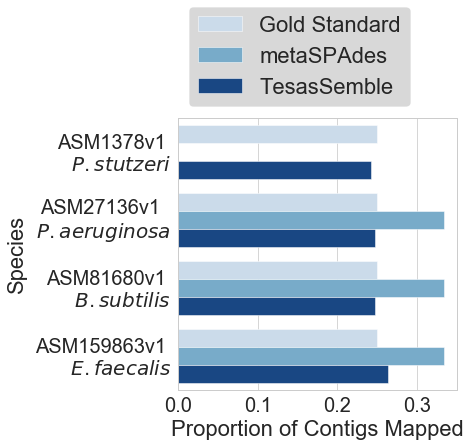

In [5]:
dfprop = pd.DataFrame(dfprop.stack())
dfprop = dfprop.reset_index()
dfprop.columns = ['Species','Method','# Contigs Mapped']


fig,ax = plt.subplots(1,1,figsize=(5,5))

sns.barplot(y='Species',x='# Contigs Mapped',hue='Method',
            palette=['#084594', '#6baed6', '#c6dbef'][::-1],data=dfprop,ax=ax)
ax.set_xlabel('Proportion of Contigs Mapped',fontsize=22)
ax.set_ylabel('Species',fontsize=22)

ax.legend(loc=2, bbox_to_anchor=(0., 1.45),
           prop={'size':22},fancybox=True, 
           framealpha=0.3,ncol=1, 
           markerscale=50, facecolor="grey")
plt.savefig('figures/fig_1_res.png',dpi=600, 
            bbox_inches='tight',  transparent=True)

plt.show()
